 # Introduction
 We are using Machine learning technique to determine the chances for getting heart diseaseU with features like age, bp and so forth.

In [227]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import product
from dython.nominal import associations
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype   
from sklearn.preprocessing import LabelEncoder

In [228]:
#import file
df = pd.read_csv(r'C:\Users\kytan\Desktop\kidney_disease.csv')

# data frame info
print('data shape: ', df.shape)
print('data info: ', df.info())
print(df.columns)  # to print out all the attributes
# print(df.head) # to print out top 5 rows of the attributes

data shape:  (400, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc          

In [229]:
# dropping the id
# didnt contribute to the prediction
df = df.drop(['id'], axis=1)

In [230]:
# check attribute data types
print(df.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [231]:
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [232]:
probColumns1 = ['rc','dm','cad','pcv','wc','classification']

for i in probColumns1:
    df[i] = df[i].str.replace('\t','')

df['dm'] = df['dm'].str.replace(' yes','yes')


In [233]:
probColumns2 = ['rc','dm','cad','pcv','wc']

for i in probColumns2:
    df[i] = df[i].replace('?',np.mean(pd.to_numeric(df[i], errors='coerce')))

In [234]:
df = df.fillna(method="ffill",limit=1)

for i in df.columns:

    if is_string_dtype(i):
        df_clean = df.fillna(df.mean())
    else:
        df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [235]:
# checking null value
df_clean.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [236]:
cols = df.columns
num_cols = df._get_numeric_data().columns
list(set(cols) - set(num_cols))


['pc',
 'pcc',
 'htn',
 'dm',
 'rc',
 'classification',
 'cad',
 'ane',
 'appet',
 'pe',
 'pcv',
 'rbc',
 'wc',
 'ba']

In [237]:
lab = LabelEncoder()
catColumns = ['appet','ba','pc','ane','pe','cad','rbc','dm','pcc','htn','classification']

for i in catColumns:
    df_clean[i]= lab.fit_transform(df_clean[i])


df_clean['pcv']=df_clean['pcv'].astype(float)
df_clean['wc']=df_clean['wc'].astype(float)
df_clean['rc']=df_clean['rc'].astype(float)


In [238]:
print(df_clean.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
dtype: object


In [239]:
from scipy import stats
df_numerical = df_clean.select_dtypes(exclude='object')
df_clean[(np.abs(stats.zscore(df_numerical)) < 3).all(axis=1)]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
5,60.0,90.0,1.015,3.0,0.0,1,1,0,0,74.0,...,39.0,7800.0,4.4,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


# Data visualisation

In [240]:
df.groupby('classification').mean()

C:\Users\kytan\AppData\Local\Temp\ipykernel_7248\2501411280.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('classification').mean()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
classification,,,,,,,,,,,
ckd,54.586345,79.156627,1.013939,1.704453,0.722449,173.489627,71.876305,4.343173,133.876168,4.770561,10.622314
notckd,46.526667,71.400000,1.022433,0.000000,0.000000,108.333333,32.840000,0.874000,141.726667,4.350667,15.183333


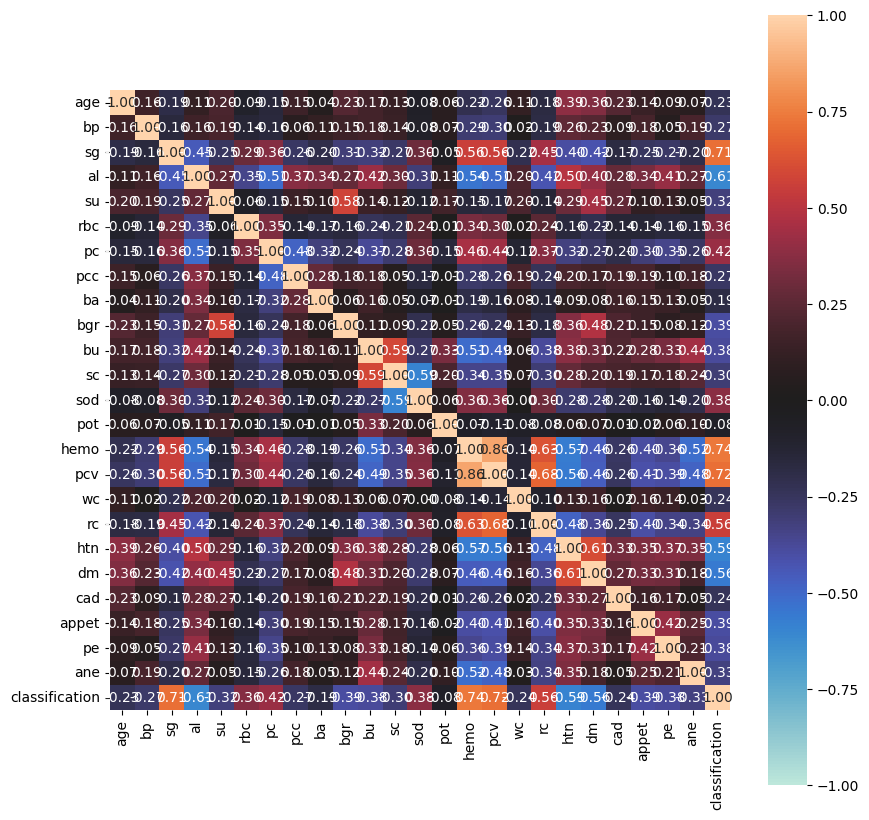

C:\Users\kytan\AppData\Local\Temp\ipykernel_7248\4222766850.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.00,0.16,-0.19,0.11,0.20,-0.09,-0.15,0.15,0.04,0.23,0.17,0.13,-0.08,0.06,-0.22,-0.26,0.11,-0.18,0.39,0.36,0.23,0.14,0.09,0.07,-0.23
bp,0.16,1.00,-0.16,0.16,0.19,-0.14,-0.16,0.06,0.11,0.15,0.18,0.14,-0.08,0.07,-0.29,-0.30,0.02,-0.19,0.26,0.23,0.09,0.18,0.05,0.19,-0.27
sg,-0.19,-0.16,1.00,-0.45,-0.25,0.29,0.36,-0.26,-0.20,-0.31,-0.32,-0.27,0.30,-0.05,0.56,0.56,-0.22,0.45,-0.40,-0.42,-0.17,-0.25,-0.27,-0.20,0.71
al,0.11,0.16,-0.45,1.00,0.27,-0.35,-0.51,0.37,0.34,0.27,0.42,0.30,-0.31,0.11,-0.54,-0.51,0.20,-0.42,0.50,0.40,0.28,0.34,0.41,0.27,-0.61
su,0.20,0.19,-0.25,0.27,1.00,-0.06,-0.15,0.15,0.10,0.58,0.14,0.12,-0.12,0.17,-0.15,-0.17,0.20,-0.14,0.29,0.45,0.27,0.10,0.13,0.05,-0.32
rbc,-0.09,-0.14,0.29,-0.35,-0.06,1.00,0.35,-0.14,-0.17,-0.16,-0.24,-0.21,0.24,0.01,0.34,0.30,0.02,0.24,-0.16,-0.22,-0.14,-0.14,-0.16,-0.15,0.36
pc,-0.15,-0.16,0.36,-0.51,-0.15,0.35,1.00,-0.48,-0.32,-0.24,-0.37,-0.28,0.30,-0.15,0.46,0.44,-0.12,0.37,-0.32,-0.27,-0.20,-0.30,-0.35,-0.26,0.42
pcc,0.15,0.06,-0.26,0.37,0.15,-0.14,-0.48,1.00,0.28,0.18,0.18,0.05,-0.17,-0.01,-0.28,-0.26,0.19,-0.24,0.20,0.17,0.19,0.19,0.10,0.18,-0.27
ba,0.04,0.11,-0.20,0.34,0.10,-0.17,-0.32,0.28,1.00,0.06,0.16,0.05,-0.07,-0.01,-0.19,-0.16,0.08,-0.14,0.09,0.08,0.16,0.15,0.13,0.05,-0.19
bgr,0.23,0.15,-0.31,0.27,0.58,-0.16,-0.24,0.18,0.06,1.00,0.11,0.09,-0.22,0.05,-0.26,-0.24,0.13,-0.18,0.36,0.48,0.21,0.15,0.08,0.12,-0.39


In [265]:
complete_correlation= associations(df_clean, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


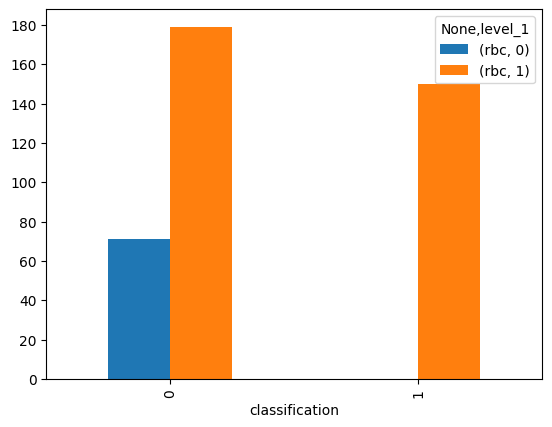

In [257]:
# rbc & classification 
pd.DataFrame(df_clean.groupby('classification')['rbc'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

# htn dm
plt.show()

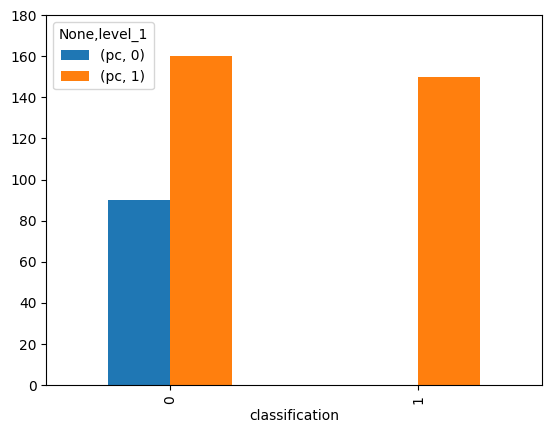

In [259]:

pd.DataFrame(df_clean.groupby('classification')['pc'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

# htn dm
plt.show()

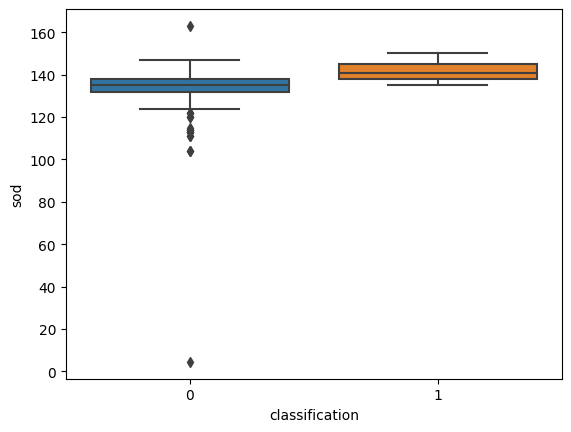

In [262]:
# al vs classification
sns.boxplot(
    data=df_clean, x="classification", y="sod")
plt.show()

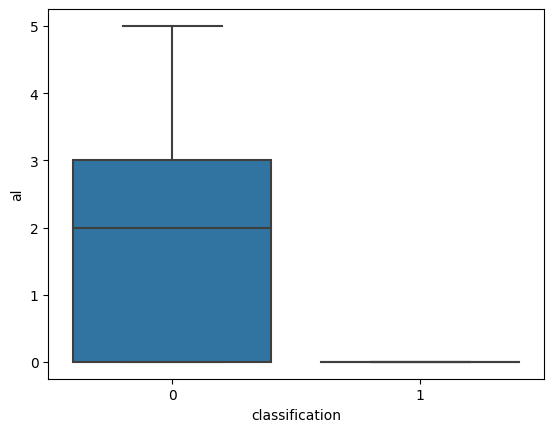

In [261]:
# al vs classification
sns.boxplot(
    data=df_clean, x="classification", y="al")

plt.show()

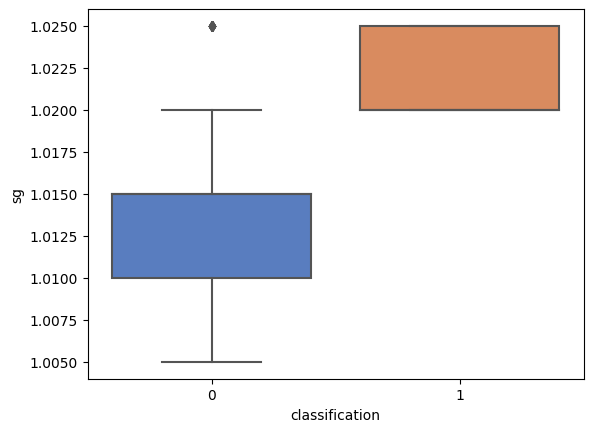

In [244]:
sns.boxplot(data=df_clean,
            x="classification",
            y="sg",
            palette = "muted"
           )
plt.show()


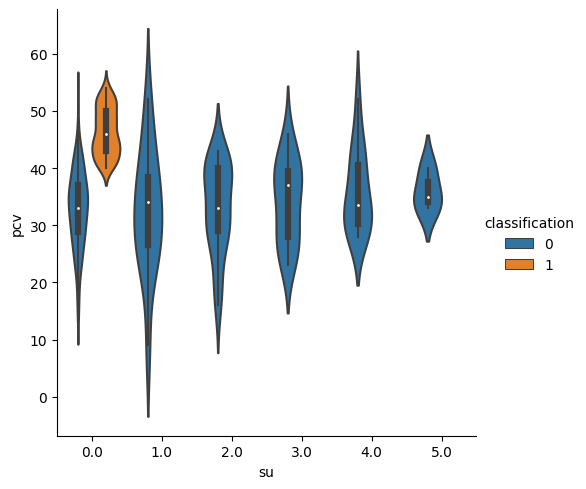

In [245]:
sns.catplot(data=df_clean, kind="violin", x="su", y="pcv", hue="classification")
plt.show()


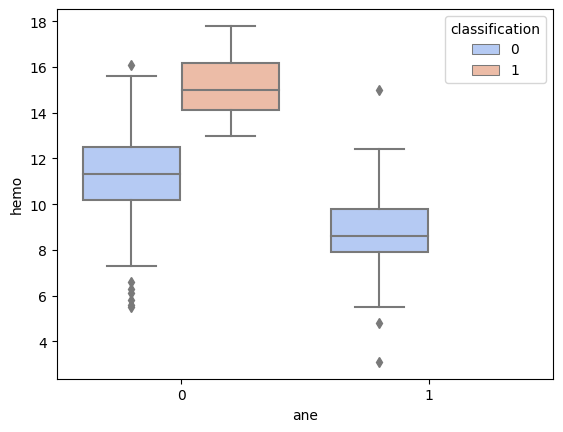

In [246]:
sns.boxplot(x="ane", y="hemo", hue="classification",data=df_clean, palette="coolwarm")
plt.show()


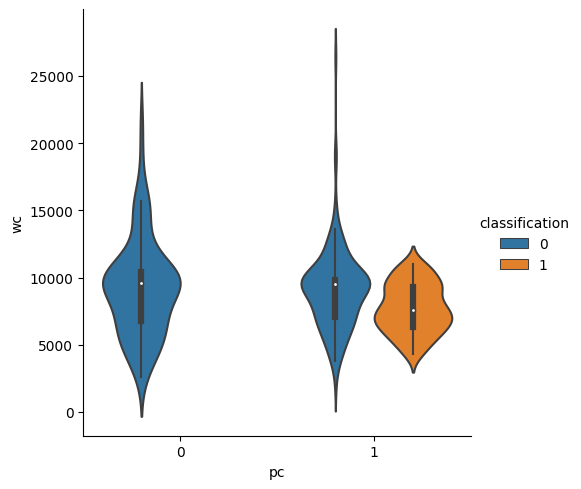

In [247]:
sns.catplot(data=df_clean, kind="violin", x="pc", y="wc", hue="classification")
plt.show()

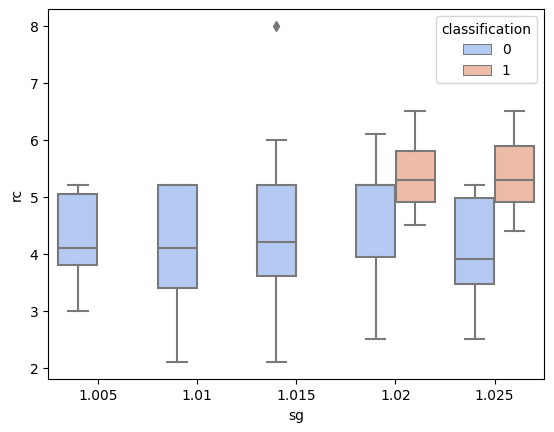

In [248]:
sns.boxplot(x="sg", y="rc",hue = 'classification',data=df_clean, palette="coolwarm")
plt.show()

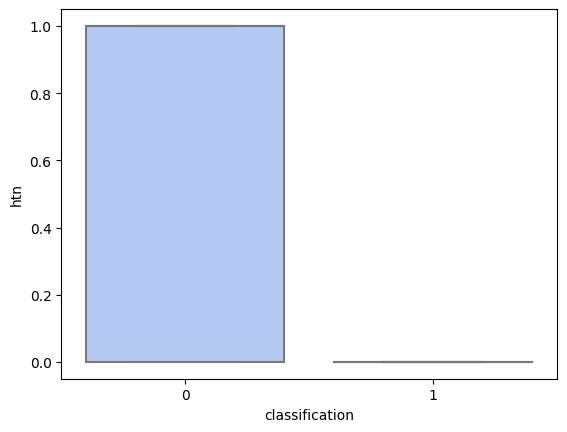

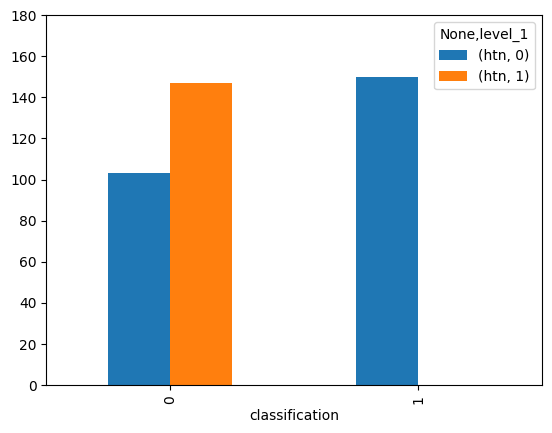

In [249]:
sns.boxplot(x="classification", y="htn",data=df_clean, palette="coolwarm")
plt.show()

pd.DataFrame(df_clean.groupby('classification')['htn'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

# htn dm
plt.show()

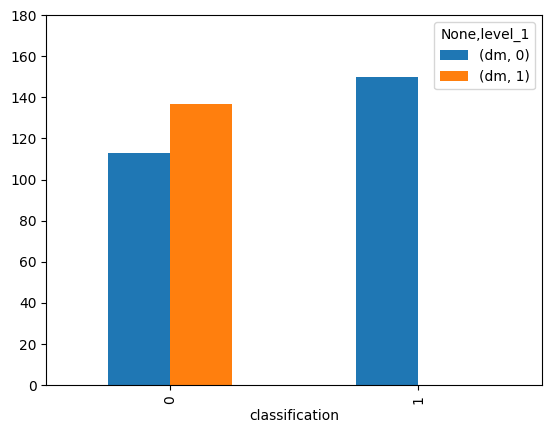

In [250]:
pd.DataFrame(df_clean.groupby('classification')['dm'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

# htn dm
plt.show()


Feature Selection

In [266]:
df_final =  df_clean.drop(['age','bp','al','su','pcc','ba','bgr','bu','sc','pot','wc','htn','dm','cad','appet','pe','ane'], axis=1)

In [285]:
df_final.shape

(400, 8)

# Splitting training & test data 

In [267]:
# Split dataset into random train and test subsets:
X = df_final.iloc[:, :-1].values
y = df_final.iloc[:, -1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 


print(X.shape, y.shape)
print(X_train[:5, :])
print(y_train[:5])

(400, 7) (400,)
[[  1.02    1.      1.    139.     16.2    50.      5.4  ]
 [  1.01    1.      1.    135.      6.1    19.      5.2  ]
 [  1.015   0.      0.    131.      9.1    29.      3.4  ]
 [  1.025   1.      1.    141.     15.5    52.      5.8  ]
 [  1.01    1.      0.    125.      8.3    23.      3.9  ]]
[1 0 0 1 0]


Model Training and Evaluation

In [276]:
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
 

In [273]:
def prediction_plot(model,X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    df_ans = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
    print(df_ans)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

In [270]:
# confusion matrix plot
def conf(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', color='black')
    ax.set_ylabel('Actual outputs',  color='black')
    ax.xaxis.set(ticks=range(2))
    ax.yaxis.set(ticks=range(2))
    # ax.set_ylim(9.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
    plt.show()


    Actual  Predicted
0        0          0
1        0          0
2        1          1
3        0          0
4        1          1
..     ...        ...
75       0          0
76       0          0
77       0          0
78       0          0
79       0          0

[80 rows x 2 columns]
Accuracy: 0.925
Mean Absolute Error: 0.075
Mean Squared Error: 0.075
Root Mean Squared Error: 0.27386127875258304
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.90      0.90      0.90        29

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



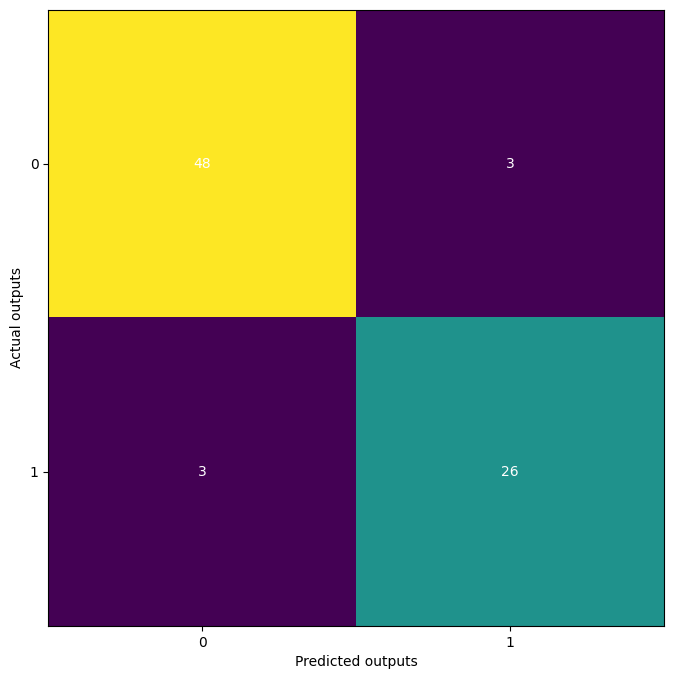

    Actual  Predicted
0        0          0
1        0          0
2        1          1
3        0          0
4        1          1
..     ...        ...
75       0          0
76       0          0
77       0          0
78       0          0
79       0          0

[80 rows x 2 columns]
Accuracy: 0.9625
Mean Absolute Error: 0.0375
Mean Squared Error: 0.0375
Root Mean Squared Error: 0.19364916731037085
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.93      0.97      0.95        29

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



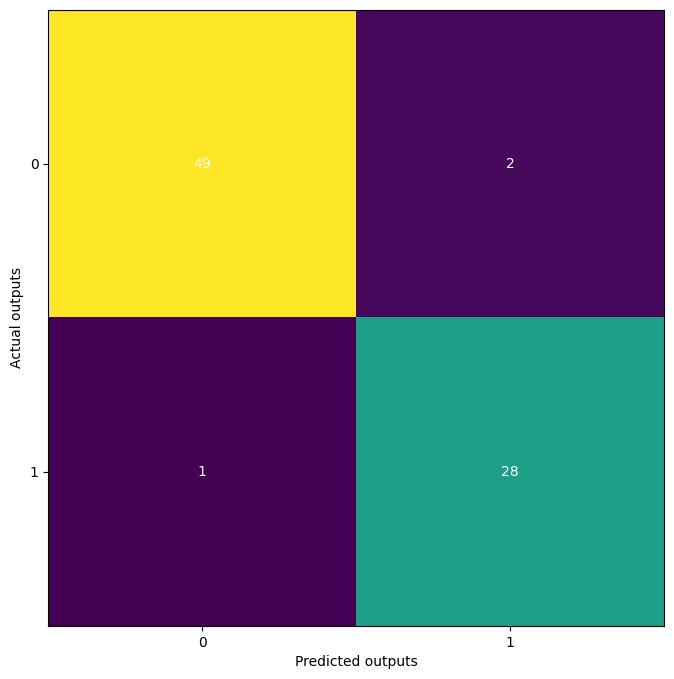

    Actual  Predicted
0        0          0
1        0          0
2        1          1
3        0          0
4        1          1
..     ...        ...
75       0          0
76       0          0
77       0          0
78       0          0
79       0          0

[80 rows x 2 columns]
Accuracy: 0.975
Mean Absolute Error: 0.025
Mean Squared Error: 0.025
Root Mean Squared Error: 0.15811388300841897
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.97      0.97      0.97        29

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



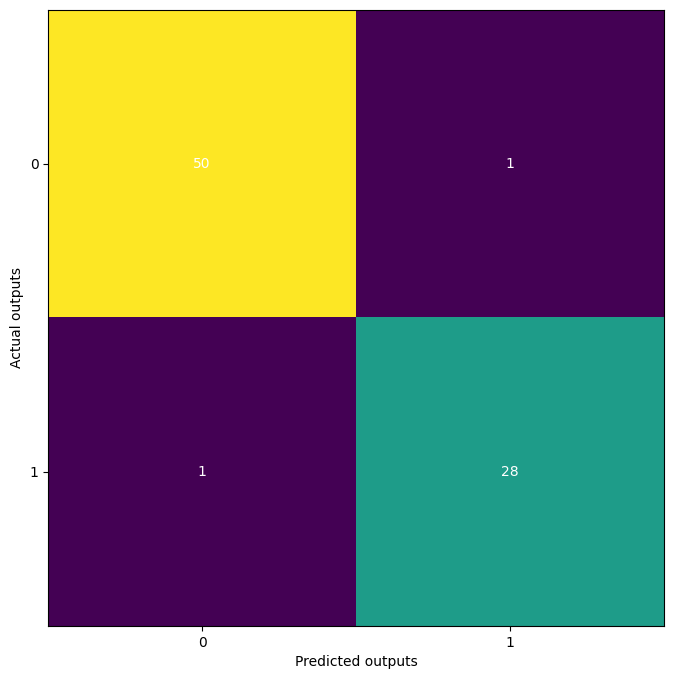

c:\Users\kytan\Documents\Python\venv\keras\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


    Actual  Predicted
0        0          0
1        0          0
2        1          1
3        0          0
4        1          1
..     ...        ...
75       0          0
76       0          0
77       0          0
78       0          0
79       0          0

[80 rows x 2 columns]
Accuracy: 0.9875
Mean Absolute Error: 0.0125
Mean Squared Error: 0.0125
Root Mean Squared Error: 0.11180339887498948
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.97      0.98        29

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



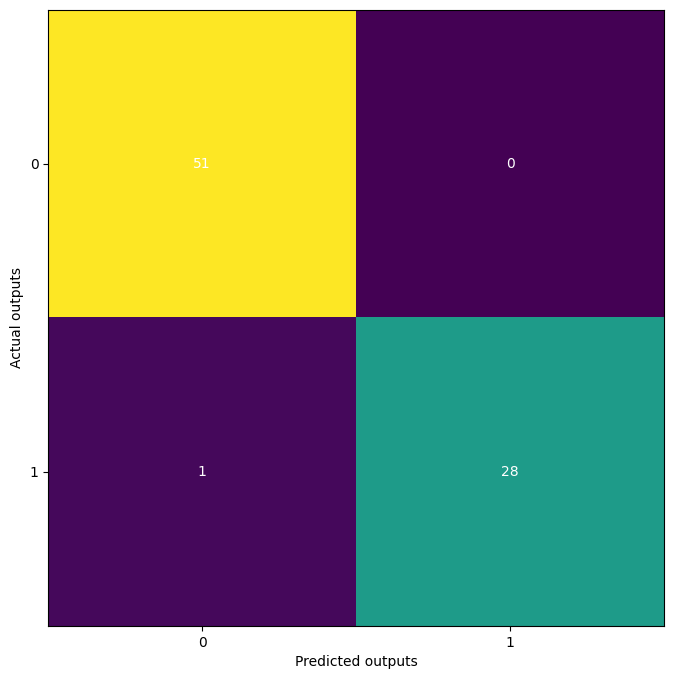

In [284]:
# fit the model
#KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)


#Logistic Regression
model= LogisticRegression(random_state=0, max_iter= 1000)  
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)

#Decision Tree
model= DecisionTreeClassifier(random_state=0)  
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)


# bagging classifier
# no. of base classifier
num_trees = 100
base_cls = DecisionTreeClassifier()
seed = 8
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)

In [281]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

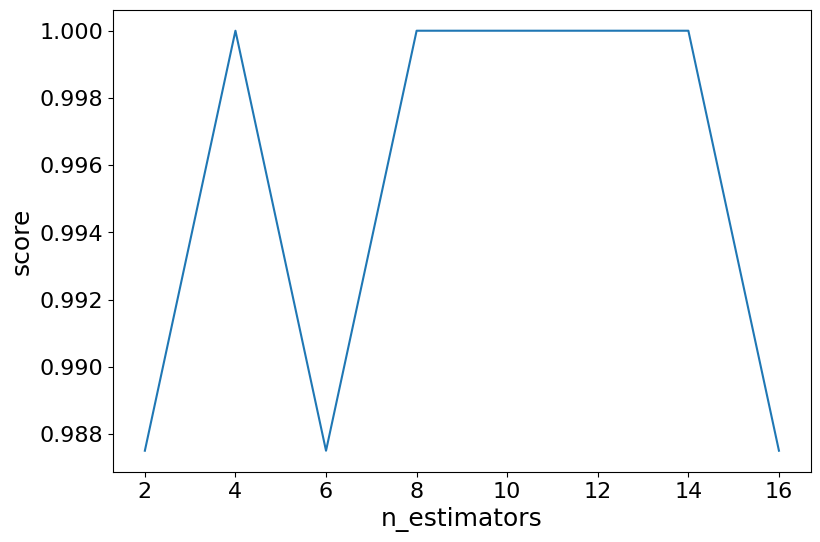

In [282]:

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()